In [40]:
import numpy as np # linear algebra
import pandas as pd

In [41]:
twitter_data=pd.read_csv("C:\\Users\\Vignesh T\\Downloads\\Twitter_Data.csv\\Twitter_Data.csv")
twitter_data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [42]:
twitter_data.shape

(162980, 2)

In [43]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [44]:
twitter_data['category'].value_counts()

category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

In [45]:
labels = pd.get_dummies(twitter_data.category)
labels.columns = ["negative", "neutral", "positive"]
labels.head()

,negative,neutral,positive
0,True,False,False
1,False,True,False
2,False,False,True
3,False,False,True
4,False,False,True


<Axes: xlabel='category', ylabel='count'>

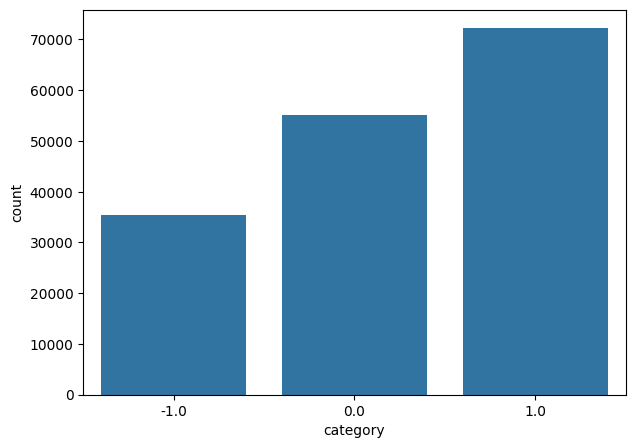

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(7,5))
sns.countplot(x="category",data=twitter_data)

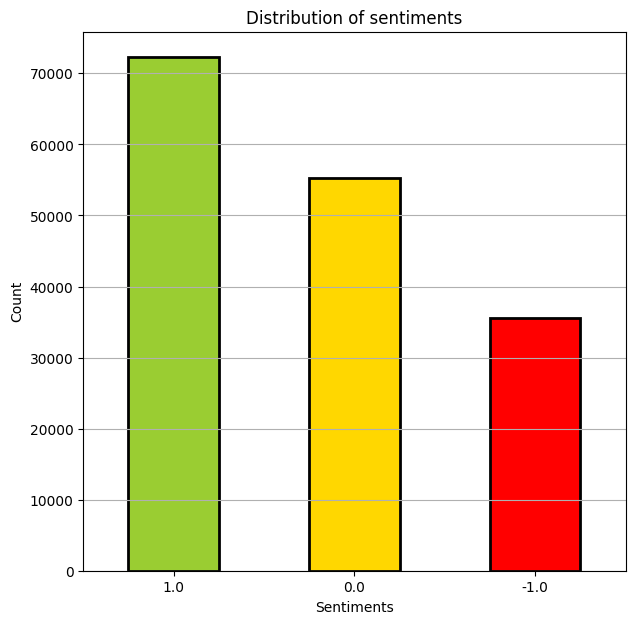

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
colors = ["yellowgreen", "gold", "red"]
wp = {"linewidth": 2, "edgecolor": "black"}

# Assuming 'twitter_data' is a DataFrame containing sentiment categories in the 'category' column
tags = twitter_data['category'].value_counts()

# Check if there's any data to plot
if not tags.empty:
    tags.plot(kind='bar', color=colors, edgecolor='black', linewidth=2)
    plt.title('Distribution of sentiments')
    plt.xlabel('Sentiments')
    plt.ylabel('Count')
    plt.xticks(rotation=0)  # Rotate x-axis labels if needed
    plt.grid(axis='y')  # Add gridlines on the y-axis
    plt.show()
else:
    print("No data to plot.")


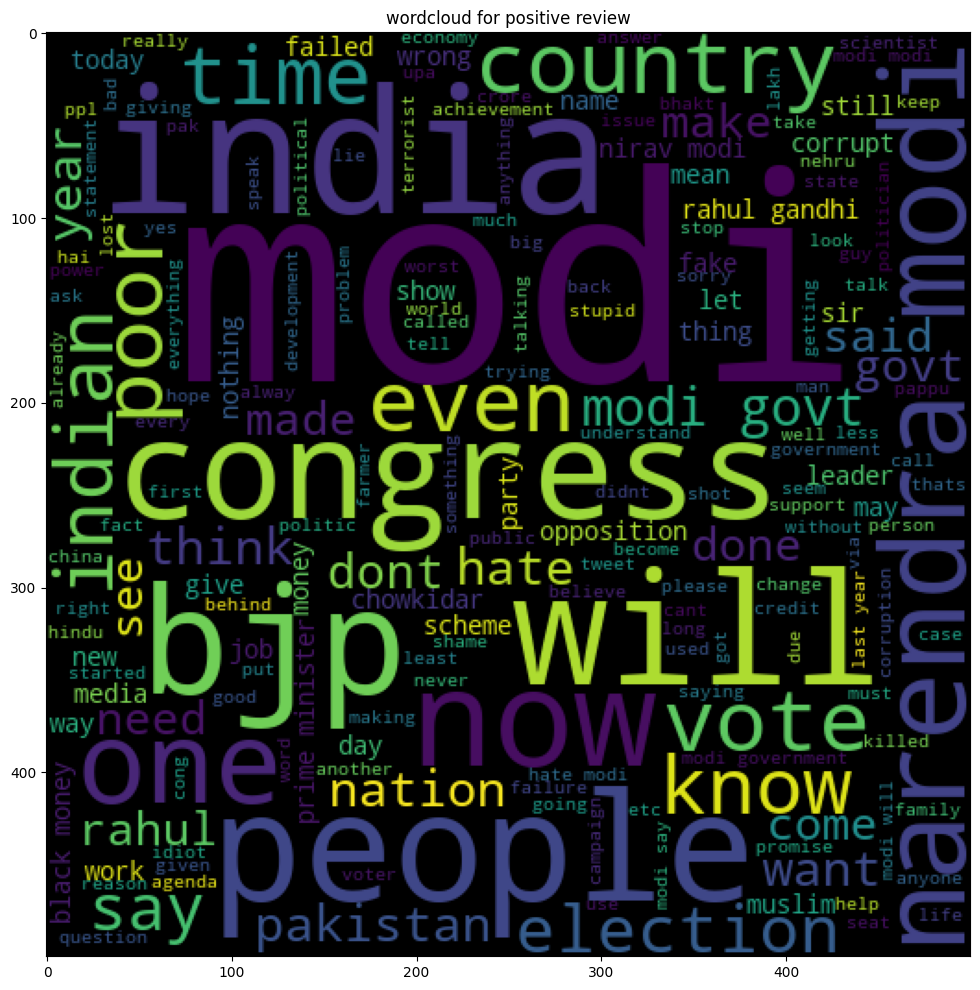

In [51]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')
positive_wc = wc.generate(twitter_data[twitter_data['category'] == 1.0]['clean_text'].str.cat(sep = " "))
neutral_wc = wc.generate(twitter_data[twitter_data['category'] == 0.0]['clean_text'].str.cat(sep = " "))
negative_wc = wc.generate(twitter_data[twitter_data['category'] == -1.0]['clean_text'].str.cat(sep = " "))
plt.figure(figsize = (12, 12))
plt.title('wordcloud for positive review')
plt.imshow(positive_wc)

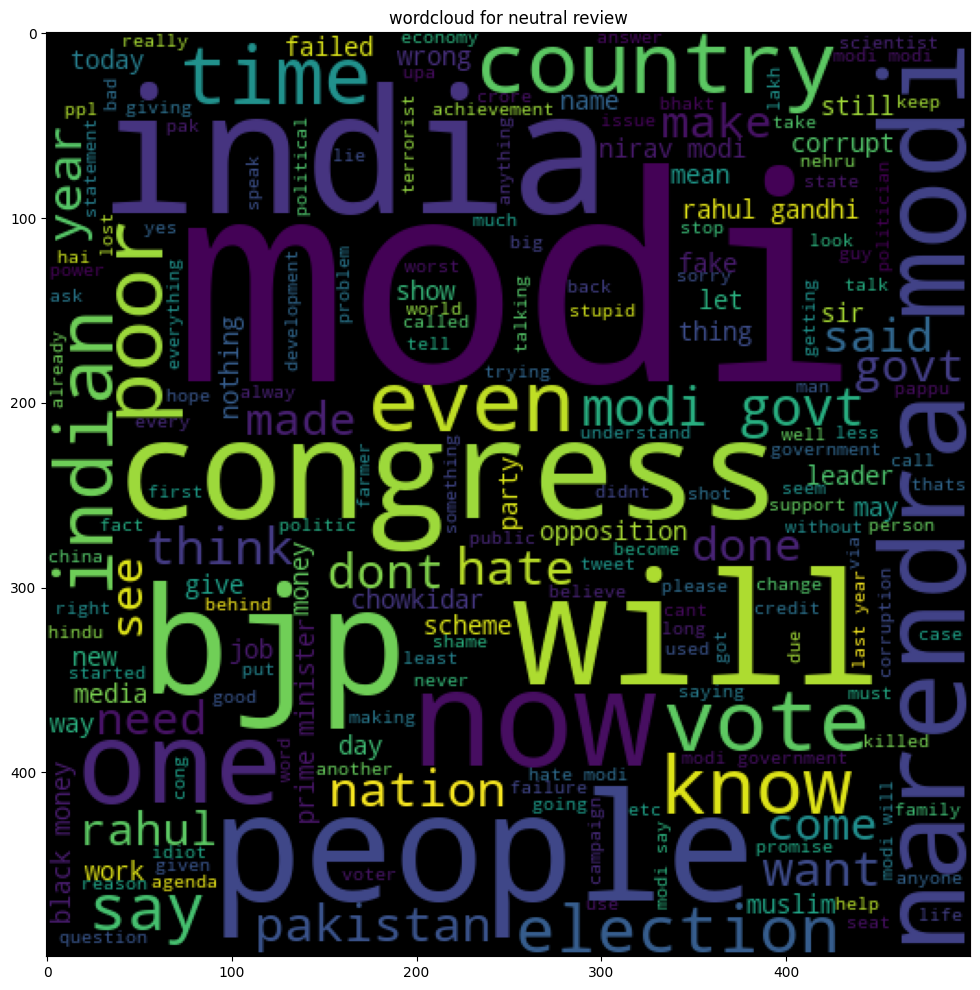

In [52]:
plt.figure(figsize = (12, 12))
plt.title('wordcloud for neutral review')
plt.imshow(neutral_wc)

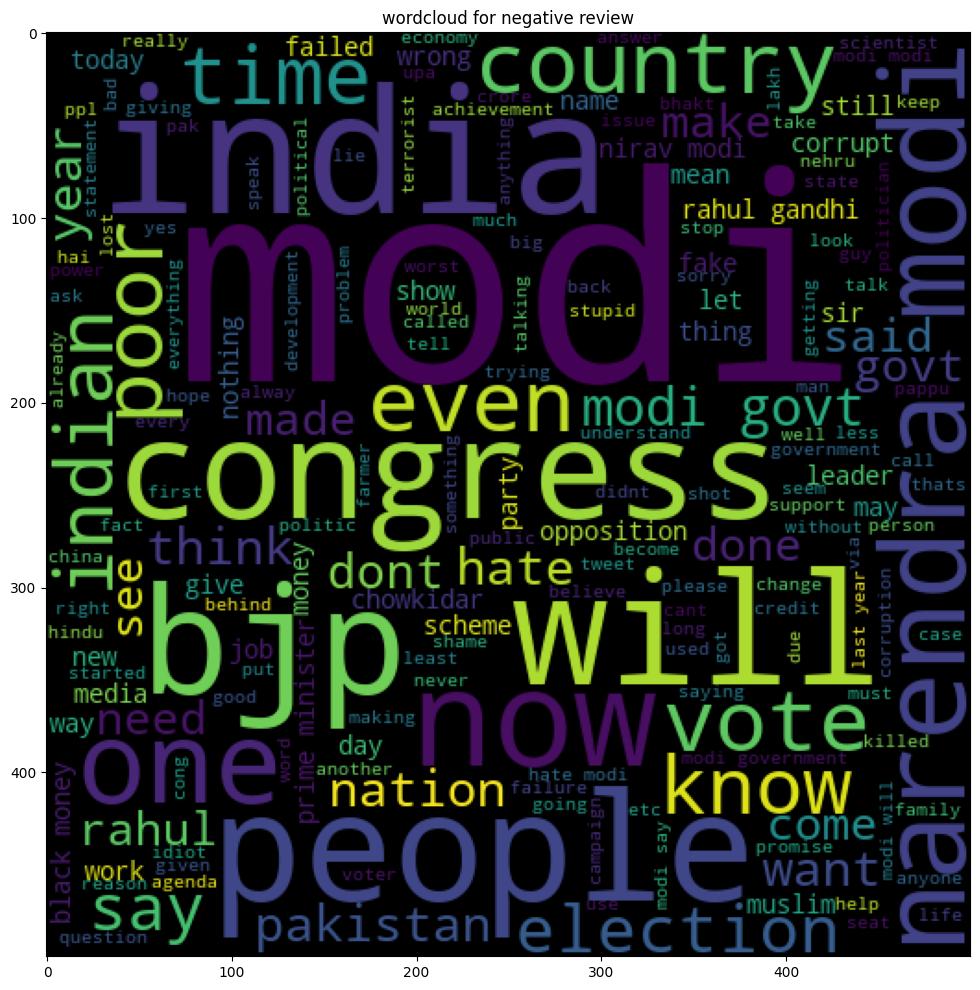

In [53]:
plt.figure(figsize = (12, 12))
plt.title('wordcloud for negative review')
plt.imshow(negative_wc)

In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,  ConfusionMatrixDisplay

In [55]:
X = twitter_data['clean_text'].values.astype('U')
y = twitter_data['category'].values.astype('U')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [56]:
pipe = Pipeline([('tfidf_vectorizer',TfidfVectorizer(lowercase = True, stop_words = 'english',analyzer = 'word')), ('naive_bayes', MultinomialNB())])
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pipe.fit(list(X_train), list(y_train))
y_pred = pipe.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
pipe['naive_bayes']

[[ 1384    44    54     0]
 [  467  5660   564     0]
 [ 8802 10860 21057     2]
 [    0     0     0     0]]
0.5747330960854092


MultinomialNB()

In [57]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [58]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

# Convert text to sequences
X_sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to have consistent length
X_padded = pad_sequences(X_sequences)

# Split the data into training and testing sets
X_train_seq, X_test_seq, y_train, y_test = train_test_split(X_padded, labels, test_size=0.3, stratify=labels)

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X_padded.shape[1]),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes: negative, neutral, positive
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
model.fit(X_train_seq, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 191s 129ms/step - accuracy: 0.7760 - loss: 0.5329 - val_accuracy: 0.9528 - val_loss: 0.1587
Epoch 2/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 182s 127ms/step - accuracy: 0.9677 - loss: 0.1095 - val_accuracy: 0.9600 - val_loss: 0.1276
Epoch 3/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 159s 112ms/step - accuracy: 0.9839 - loss: 0.0503 - val_accuracy: 0.9627 - val_loss: 0.1278
Epoch 4/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 157s 110ms/step - accuracy: 0.9900 - loss: 0.0317 - val_accuracy: 0.9608 - val_loss: 0.1453
Epoch 5/5
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 156s 109ms/step - accuracy: 0.9954 - loss: 0.0151 - val_accuracy: 0.9627 - val_loss: 0.1498


In [61]:
loss, accuracy = model.evaluate(X_test_seq, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

1528/1528 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9638 - loss: 0.1379
Test Loss: 0.1409655064344406, Test Accuracy: 0.9640037417411804
